In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv 
from sklearn.model_selection import train_test_split
from lls import LinearLeastSquare

In [31]:
data = pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [32]:
data['Sex'].replace(['F', 'M', 'I'], [0, 1, 2], inplace=True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [33]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
Length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [34]:
data = data.drop(['Sex'], axis=1)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


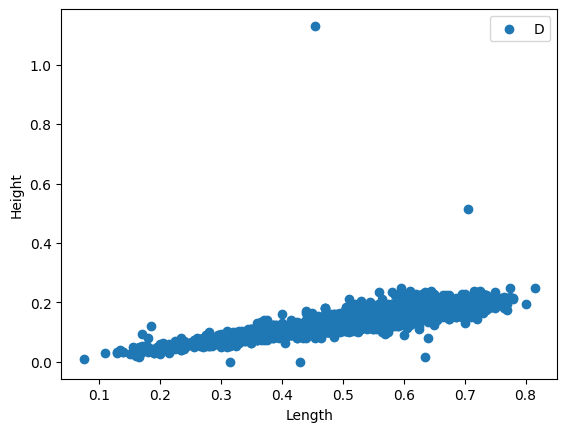

In [35]:
plt.scatter(data['Length'], data['Height'])
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend('Data')
plt.show()

In [36]:
x = np.array(data[['Length']])
y = np.array(data[['Height']])

print(x.shape)
print(y.shape)

(4177, 1)
(4177, 1)


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3132, 1)
(3132, 1)
(1045, 1)
(1045, 1)


In [38]:
lls = LinearLeastSquare()
lls.fit(x_train, y_train)

y_pred = lls.predict(x_test)

In [21]:
# w = (X.T * X )^-1 * X.T * Y  

# w = np.matmul(  np.matmul(np.linalg.inv( np.matmul(x_train.T  , x_train) ) , x_train.T ) , y_train )

# w = inv(x.T @ x) @ x.T @ y
# w

array([[0.26735293]])

In [22]:
# y_pred = x_test @ w

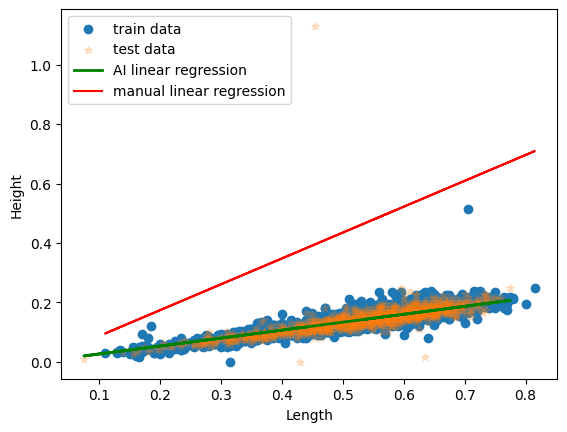

In [39]:
plt.scatter(x_train, y_train, marker='o')
plt.scatter(x_test, y_test, marker='*', alpha=0.2)
plt.plot(x_test, y_pred, color= 'green', lw=2) 
plt.plot(x_train, 0.87 * x_train, color= 'red')
plt.xlabel('Length')
plt.ylabel('Height')
plt.legend(['train data', 'test data', 'AI linear regression', 'manual linear regression'], loc='upper left')
plt.show()

In [40]:
lls.evaluate(x_test, y_test, 'mae')

0.014351297003232961

In [27]:
# predict

x_test = 0.49   #length
y_pred = w * x_test
print('height:', y_pred)

height: [[0.13100294]]
